In [ ]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['train.csv']))

uploaded =files.upload()
df3 = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Dataset is now stored in a Pandas Dataframe

Saving train.csv to train.csv


Saving test.csv to test.csv


In [ ]:
import numpy as np
df2.fillna(0, inplace=True)
df2['Sex_factor'] = pd.factorize(df2.Sex)[0]  # turns male, female to 0,1

train_data = np.array((  df2['Pclass'], df2['Sex_factor'], df2['Age'], df2['Fare'], df2['SibSp'], df2['Parch'], df2['Survived']))
                                   
print(train_data[0:6,:])
mean = train_data[0:6,:].mean(axis=0)     # need to normalize just the age 
std = train_data[0:6,:].std(axis=0)
train_data[0:6,:]-=mean
train_data[0:6,:]/=std
print(train_data.shape[0]-1)

[[ 3.      1.      3.     ...  3.      1.      3.    ]
 [ 0.      1.      1.     ...  1.      0.      0.    ]
 [22.     38.     26.     ...  0.     26.     32.    ]
 [ 7.25   71.2833  7.925  ... 23.45   30.      7.75  ]
 [ 1.      1.      0.     ...  1.      0.      0.    ]
 [ 0.      0.      0.     ...  2.      0.      0.    ]]
6


In [ ]:
a=[[1,2,3,4,5],[6,7,8,9,10]]
b= np.transpose(a)
print(a)
np.random.shuffle(b)
print(b)

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
[[ 5 10]
 [ 4  9]
 [ 1  6]
 [ 2  7]
 [ 3  8]]


In [ ]:
# Building the network

from keras import models, layers
def build_model():
  model =models.Sequential()
  model.add(layers.Dense(64, activation ='softmax', input_shape = (train_data.shape[0]-1,)  ))
  model.add(layers.Dense(32, activation='relu'))
 # model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1))  # Final layer is a prediction of a single value. Lets network able to predict any value rather than constraining it
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary
  return model

The below is a k-fold validation technique

In [ ]:
k=5 
num_epochs =600
num_validation_samples = len(train_data[0])//k
train_data = np.transpose(train_data)
np.random.shuffle(train_data)
train_data = np.transpose(train_data)


validation_scores=[]
acc_histories=[]
loss_histories=[]
val_acc_histories=[]
val_loss_histories=[]

for fold in range(k):
  val_data =train_data[0:6,num_validation_samples*fold: num_validation_samples*(fold+1)]
  val_labels = train_data[6,num_validation_samples*fold: num_validation_samples*(fold+1)]

  training_data = np.concatenate ((train_data[0:6,:num_validation_samples*fold],
                                  train_data[0:6, num_validation_samples*(fold+1):]), axis =1) # + is a list concatenation
  training_labels = np.concatenate ((train_data[6,:num_validation_samples*fold],
                                  train_data[6,num_validation_samples*(fold+1):]))
  training_data = np.transpose(training_data)
  
  val_data=np.transpose(val_data)
 # print(training_data.shape)
 # print(val_data.shape)

  model =build_model()
  from keras import backend as K
  K.set_value(model.optimizer.learning_rate, 0.0001)
  history = model.fit(training_data, training_labels, epochs=num_epochs, batch_size=32, verbose=0,
                      validation_data =(val_data, val_labels) )
  
  #validation_score =model.evaluate(val_data, val_labels)
  
  #validation_scores.append(validation_score)
  acc_histories.append(history.history['accuracy'])
  loss_histories.append( history.history['loss'])
  val_acc_histories.append(history.history['val_accuracy'])
  val_loss_histories.append(history.history['val_loss'])

  #print(type(training_data), type(training_labels))
  #print(type(val_data), type(val_labels))
  #print(type(history.history["val_loss"]), type(history.history["loss"]))
  #print(history.history["val_loss"])
  #print(history.history['loss'])



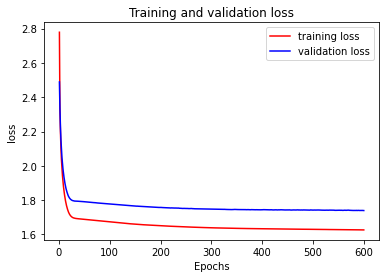

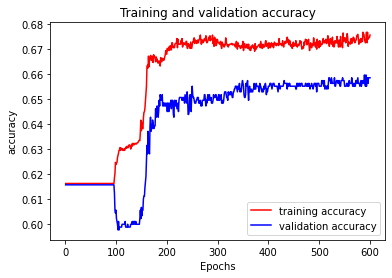

In [ ]:
import matplotlib.pyplot as plt

avg_acc= [ np.mean([x[i] for x in acc_histories]) for i in range(num_epochs)]
avg_loss= [ np.mean([x[i] for x in loss_histories]) for i in range(num_epochs)]
avg_val_acc= [ np.mean([x[i] for x in val_acc_histories]) for i in range(num_epochs)]
avg_val_loss= [ np.mean([x[i] for x in val_loss_histories]) for i in range(num_epochs)]


epochs = range(1,num_epochs+1)

plt.plot(epochs, avg_loss, 'r', label ='training loss')
plt.plot( epochs, avg_val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs, avg_acc, 'r', label ='training accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



The below is a simple training technique on the entire training dataset

In [ ]:
model =build_model()
t_data = np.transpose(train_data[0:6])
num_epochs=1000
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
history = model.fit(t_data, train_data[6], epochs=num_epochs,batch_size=32, verbose=0)



dict_keys(['loss', 'accuracy'])


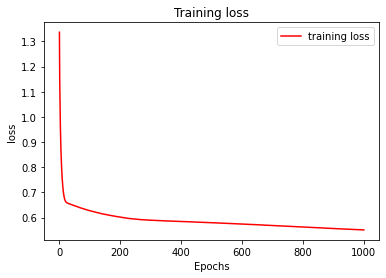

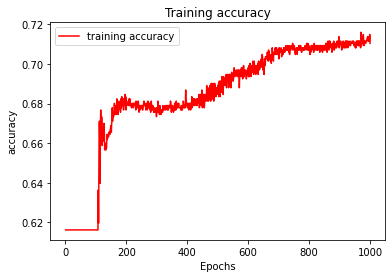

In [ ]:
print(history.history.keys())

epochs = range(1,num_epochs+1)
loss = history.history['loss']
acc=history.history['accuracy']

plt.plot(epochs, loss, 'r', label ='training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'r', label ='training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Ignore below

In [ ]:
from keras import Input, layers, Model
def build_model(data):
  Pclass_input = Input(shape = (6,))
  #Sex_input = Input(shape = (1,))
  #Age_input= Input(shape = (1,))
  #Fare_input=Input(shape = (1,))
  #SibSp_input = Input(shape=(1,))
  #Parch_input=Input(shape=(1,))

  merged = layers.Concatenate(axis=1)([Pclass_input, Sex_input, Age_input, Fare_input,
                                             SibSp_input, Parch_input])
  hidden1= layers.Dense(64, input_dim = 5, activation = 'softmax', use_bias =True )(merged)
  hidden2= layers.Dense(64, input_dim = 64, activation = 'softmax', use_bias =True )(hidden1)

 # Pclass_hidden = layers.Dense( 16 , activation= 'sigmoid')(Pclass_input)
 # Pclass_hidden1 = layers.Dense( 16 , activation = 'sigmoid')(Pclass_hidden)

 # Sex_hidden = layers.Dense( 16 , activation= 'sigmoid')(Sex_input)
 # Sex_hidden1 = layers.Dense( 16 , activation = 'sigmoid')(Sex_hidden)

 # Age_hidden = layers.Dense( 16 , activation= 'sigmoid')(Age_input)
 # Age_hidden1 = layers.Dense( 16 , activation = 'sigmoid')(Age_hidden)

 # Fare_hidden = layers.Dense( 16 , activation= 'sigmoid')(Fare_input)
 # Fare_hidden1 = layers.Dense( 16 , activation = 'sigmoid')(Fare_hidden)

 # SibSp_hidden = layers.Dense( 16 , activation= 'sigmoid')(SibSp_input)
 # SibSp_hidden1 = layers.Dense( 16 , activation = 'sigmoid')(SibSp_hidden)

 # Parch_hidden = layers.Dense( 16 , activation= 'sigmoid')(Parch_input)
 # Parch_hidden1 = layers.Dense( 16 , activation = 'sigmoid')(Parch_hidden)

 # concatenated= layers.concatenate([Pclass_hidden1, Sex_hidden1, Age_hidden1, Fare_hidden1,
  #                                  SibSp_hidden1, Parch_hidden1], axis=-1)
  
 # output = layers.Dense(1, activation = 'sigmoid')(concatenated)
  output = layers.Dense(1, activation = 'sigmoid')(hidden2)
  
  model = Model([Pclass_input, Sex_input, Age_input, Fare_input, SibSp_input, Parch_input], output)
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
k=5 
num_validation_samples = len(train_data)//k
np.random.shuffle(train_data)

validation_scores=[]
acc_histories=[]
loss_histories=[]
for fold in range(k):
  val_data =train_data[num_validation_samples*fold: num_validation_samples*(fold+1)]
  training_data = np.concatenate ((train_data[:num_validation_samples*fold,:],
                                  train_data[num_validation_samples*(fold+1):,:])) # + is a list concatenation

  answers = training_data[:,6]
  
  model =build_model(training_data)
  history = model.fit([ training_data[:,0], training_data[:,1], training_data[:,2], training_data[:,3],
                       training_data[:,4], training_data[:,5]] , answers, epochs=50, batch_size=10, verbose=0 )
  
  validation_score =model.evaluate([ val_data[:,0], val_data[:,1], val_data[:,2], val_data[:,3],
                                    val_data[:,4], val_data[:,5]], val_data[:,6])
  
  validation_scores.append(validation_score)
  acc_history = history.history['accuracy']
  loss_history = history.history['loss']
  acc_histories.append(acc_history)
  loss_histories.append(loss_history)

#model =build_model(train_data)
#history = model.fit([ train_data[:,0], train_data[:,1], train_data[:,2]], train_data[:,3],
#                    validation_data = ([val_data[:,0], val_data[:,1], val_data[:,2]], val_data[:,3]),
#                    epochs = 50, batch_size=1, verbose=0)

[-0.78927234 -0.78927234 -0.78927234 -0.78927234 -0.78927234  1.2669898
 -0.78927234 -0.78927234 -0.78927234  1.2669898   1.2669898   1.2669898
 -0.78927234  1.2669898   1.2669898   1.2669898   1.2669898  -0.78927234
  1.2669898  -0.78927234  1.2669898  -0.78927234  1.2669898  -0.78927234
 -0.78927234 -0.78927234 -0.78927234  1.2669898  -0.78927234 -0.78927234
  1.2669898   1.2669898  -0.78927234  1.2669898  -0.78927234  1.2669898
 -0.78927234 -0.78927234  1.2669898  -0.78927234 -0.78927234 -0.78927234
  1.2669898  -0.78927234 -0.78927234 -0.78927234  1.2669898  -0.78927234
  1.2669898   1.2669898   1.2669898   1.2669898   1.2669898  -0.78927234
  1.2669898  -0.78927234 -0.78927234 -0.78927234 -0.78927234 -0.78927234
 -0.78927234  1.2669898  -0.78927234  1.2669898   1.2669898   1.2669898
 -0.78927234  1.2669898   1.2669898  -0.78927234 -0.78927234 -0.78927234
 -0.78927234  1.2669898  -0.78927234 -0.78927234 -0.78927234 -0.78927234
 -0.78927234 -0.78927234  1.2669898  -0.78927234 -0.789

KeyboardInterrupt: ignored

In [ ]:
# plot results
num_epochs=50
average_mae_history = [np.mean( [x[i] for x in all_mae_histories]) for i in range(num_epochs) ]
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel(' Validation MAE')
plt.show()

def smooth_curve(points, factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


NameError: ignored

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'